In [4]:
import supereeg as se
import numpy as np
import os
import glob as glob
import copy
from scipy.io import loadmat as load
from scipy.spatial.distance import pdist, cdist, squareform
from visbrain.objects import BrainObj, ColorbarObj, SceneObj, SourceObj
from visbrain.io import download_file, read_stc


In [5]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [6]:
def smallest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, n)[:n]
    indices = indices[np.argsort(flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [7]:
def rbf(centers, widths, locs):
    """
    Radial basis function
    Parameters
    ----------
    centers : ndarray
        rbf coordinates (one row per RBF)
    widths : ndarray
        RBF radii
    locs : ndarray
        locations to evaluate the RBFs (one row per location)
        
    Returns
    ----------
    results : ndarray
        Matrix of RBF weights for each RBF (row), at each location (column)
    """    
    weights = np.exp(np.divide(-cdist(locs, centers, metric='euclidean') ** 2, np.tile(np.array(widths, ndmin=2), [locs.shape[0], 1])))
    return weights.T

In [8]:
results_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [9]:
data_dir = os.path.join(results_dir, 'mean_corrs')
corrs_dir = os.path.join(data_dir, 'corrs')

In [10]:
posterior = load(os.path.join(results_dir, '../data/pieman_posterior_K700.mat'))
centers = posterior['posterior']['centers'][0][0][0][0][0]
widths = np.array(list(posterior['posterior']['widths'][0][0][0][0][0][:, 0].T))

In [11]:
template = se.helpers._gray(res=2)

In [65]:
top_n = 10
l = 0
c = 'intact'
conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
g_m = np.load(conds[0])

networks = copy.copy(g_m)
np.fill_diagonal(networks, 0)
net_inds = largest_indices(np.triu(networks), top_n)
pos_mask = networks[net_inds] > 0
net_inds = np.concatenate((net_inds[0][pos_mask], net_inds[1][pos_mask]))
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]

In [66]:
data1 =  np.ones((temp_locs.shape[0]))
locs1 = temp_locs

In [67]:
np.ones((temp_locs.shape[0]))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [68]:
b1_try = se.Brain(data=np.ones((temp_locs.shape[0])), locs=temp_locs)

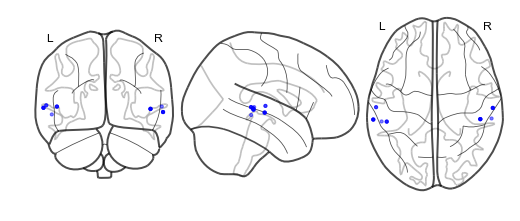

In [69]:
b1_try.plot_locs()

In [70]:
top_n = 10
l = 1
c = 'intact'
conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
g_m = np.load(conds[0])

networks = copy.copy(g_m)
np.fill_diagonal(networks, 0)
net_inds = largest_indices(np.triu(networks), top_n)
pos_mask = networks[net_inds] > 0
net_inds = np.concatenate((net_inds[0][pos_mask], net_inds[1][pos_mask]))
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]

In [71]:
data2 = np.ones((temp_locs.shape[0]))+1
locs2 = temp_locs

In [72]:
data2.shape


(20,)

In [73]:
b2_try = se.Brain(data=np.ones((temp_locs.shape[0]))+1, locs=temp_locs)

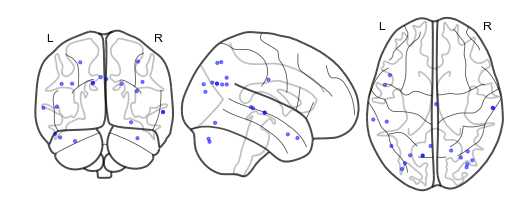

In [74]:
b2_try.plot_locs()

In [97]:
data_all = np.concatenate((data1, data2))
locs_all = np.vstack((locs1, locs2))

In [99]:
ball = se.Brain(data_all, locs= locs_all)

In [87]:
ball.get_locs()

,x,y,z
0,48.711704,-32.083177,0.676935


In [103]:

data_comb = ball.get_data().values.ravel()
xyz_comb = ball.locs.values

In [107]:
ball.save('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/combined.bo')

In [106]:
ball = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/combined.bo')
data_comb = ball.get_data().values.ravel()
xyz_comb = ball.locs.values

template_brain = 'white'

sc = SceneObj(bgcolor='B3', size=(500, 500))
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`
CBAR_STATE = dict(cbtxtsz=12, clim=[0, 5], txtsz=10., width=.1, cbtxtsh=3.,
                  rect=(-.3, -2., 1., 4.))
KW = dict(title_size=14., zoom=1)

# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz_comb, data=data_comb, cmap='viridis')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data_comb)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, cmap='viridis')

sc.add_to_subplot(s_obj_1, row=0, col=1)
sc.add_to_subplot(b_obj_proj, row=0, col=1, rotate='left', use_this_cam=True)

cb_proj = ColorbarObj(s_obj_1, cblabel='Largest', **CBAR_STATE)
sc.add_to_subplot(cb_proj, row=0, col=2, width_max=200)
sc.screenshot('/Users/lucyowen/Desktop/try_visbrain/ex_brain_obj.png', transparent=True)


Creation of a scene
BrainObj(name='white') created
SourceObj(name='iEEG') created
    40 sources detected
    Color iEEG using a data vector
    Project the source's modulation (radius=10.0, contribute=False)
    40 sources visibles and not masked used for the projection
    SourceObj(name='iEEG') added to the scene
    BrainObj(name='white') added to the scene
Get colorbar properties from SourceObj(name='iEEG') object
ColorbarObj(name='iEEGCbar') created
    ColorbarObj(name='iEEGCbar') added to the scene


AttributeError: 'CanvasBackend' object has no attribute '_physical_size'

In [12]:
top_n = 10
l = 0
c = 'intact'
conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
g_m = np.load(conds[0])

networks = copy.copy(g_m)
np.fill_diagonal(networks, 0)
net_inds = largest_indices(np.triu(networks), top_n)
pos_mask = networks[net_inds] > 0
net_inds = np.concatenate((net_inds[0][pos_mask], net_inds[1][pos_mask]))
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]

w = rbf(temp_locs, temp_widths, template.get_locs().values)
b1 = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)

data1 = b1.get_data().values.ravel()
xyz1 = b1.get_locs().values
xyz1 = xyz1[data1>.9999]
data1 = data1[data1>.9999]

In [57]:
top_n = 10
l = 1
c = 'intact'
conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
g_m = np.load(conds[0])

networks = copy.copy(g_m)
np.fill_diagonal(networks, 0)
net_inds = largest_indices(np.triu(networks), top_n)
pos_mask = networks[net_inds] > 0
net_inds = np.concatenate((net_inds[0][pos_mask], net_inds[1][pos_mask]))
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]

w = rbf(temp_locs, temp_widths, template.get_locs().values)
b2 = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)

b2.save('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_2_largest.bo')
data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

In [109]:
top_n = 10
l = 3
c = 'intact'
conds = glob.glob(os.path.join(data_dir, f'level_{l}', f'{c}.npy'))
g_m = np.load(conds[0])

networks = copy.copy(g_m)
np.fill_diagonal(networks, 0)
net_inds = largest_indices(np.triu(networks), top_n)
pos_mask = networks[net_inds] > 0
net_inds = np.concatenate((net_inds[0][pos_mask], net_inds[1][pos_mask]))
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]

w = rbf(temp_locs, temp_widths, template.get_locs().values)
b2 = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)

b2.save('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_4_largest.bo')
data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

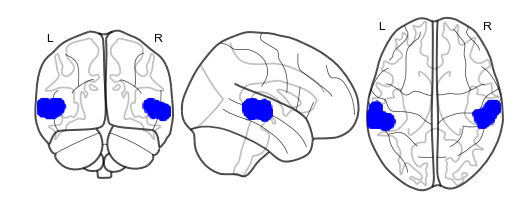

In [24]:
try_brain = se.Brain(data1, locs=xyz1)
try_brain.plot_locs()

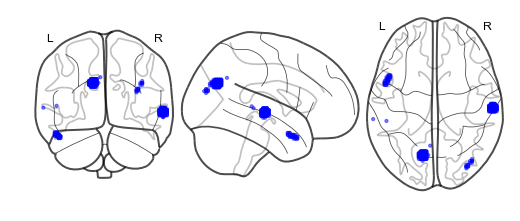

In [23]:
try_brain = se.Brain(data2, locs=xyz2)
try_brain.plot_locs()

In [25]:
b1 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_1_largest.bo')
b2 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_2_largest.bo')
#b3 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_3_largest.bo')

data1 = b1.get_data().values.ravel()
xyz1 = b1.get_locs().values
xyz1 = xyz1[data1>.9999]
data1 = data1[data1>.9999]

data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

data_all = np.concatenate((data1, data2))
xyz_all = np.vstack((xyz1, xyz2))

template_brain = 'white'

sc = SceneObj(bgcolor='white', size=(500, 500))
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`
CBAR_STATE = dict(cbtxtsz=12, clim=[0, 5], txtsz=10., width=.1, cbtxtsh=3.,
                  rect=(-.3, -2., 1., 4.))
KW = dict(title_size=14., zoom=1)

# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz_all, data=data_all, cmap='viridis')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data_all)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, radius=1, cmap='viridis')

sc.add_to_subplot(s_obj_1, row=0, col=1)
sc.add_to_subplot(b_obj_proj, row=0, col=1, rotate='left', use_this_cam=True)

cb_proj = ColorbarObj(s_obj_1, cblabel='Largest', **CBAR_STATE)
sc.add_to_subplot(cb_proj, row=0, col=2, width_max=200)
sc.screenshot('/Users/lucyowen/Desktop/try_visbrain/ex_brain_obj.png', transparent=True)


OSError: ``/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_3_largest.bo`` does not exist

In [52]:
import matplotlib.colors as mcolors
b1 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_1_largest.bo')
b2 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_2_largest.bo')

data1 = b1.get_data().values.ravel()
xyz1 = b1.get_locs().values
xyz1 = xyz1[data1>.9999]
data1 = data1[data1>.9999]

data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

template_brain = 'B3'

sc = SceneObj(bgcolor='white', size=(500, 500))
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`
CBAR_STATE = dict(cbtxtsz=12, txtsz=10., width=.1, cbtxtsh=3.,
                  rect=(-.3, -2., 1., 4.))
KW = dict(title_size=14., zoom=1)

# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_l = SourceObj('iEEG', xyz1, data=data1, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_l.color_sources(data=data1)
s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Blues')
# Just for fun, color sources according to the data :)
s_obj_2.color_sources(data=data2)

#s_obj_3 = s_obj_l + s_obj_2

# Project source's activity
s_obj_l.project_sources(b_obj_proj, radius=1, cmap='Reds')
#b_obj_proj.project_sources(s_obj_3, cmap='Reds')
# Finally, add the source and brain objects to the subplot
sc.add_to_subplot(s_obj_l)
sc.add_to_subplot(b_obj_proj, rotate='right', use_this_cam=True)

# b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=True)
# s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Blues')


# Just for fun, color sources according to the data :)
# s_obj_2.color_sources(data=data2)
# # Project source's activity
b_obj_proj.project_sources(s_obj_2, radius=1, cmap='Blues')
#s_obj_2.project_sources(b_obj_proj, cmap='Blues')
# Finally, add the source and brain objects to the subplot
sc.add_to_subplot(s_obj_2)
#b_obj_proj_1 = BrainObj(template_brain, hemisphere='right', translucent=False)
sc.add_to_subplot(b_obj_proj, rotate='right', use_this_cam=True)


# # First, define a brain object used for the projection
# b_obj_proj_r = BrainObj(template_brain, hemisphere='left', translucent=False)
# # Define the source object
# s_obj_r = SourceObj('iEEG', xyz, data=data, cmap='Reds')
# # Just for fun, color sources according to the data :)
# s_obj_r.color_sources(data=data)
# # Project source's activity
# s_obj_r.project_sources(b_obj_proj_r, cmap='Reds')

# sc.add_to_subplot(s_obj_r, row=0, col=1)
# sc.add_to_subplot(b_obj_proj_r, row=0, col=1, rotate='left', use_this_cam=True)



# Finally, add the colorbar :
cb_proj = ColorbarObj(s_obj_l, cblabel='Largest', clim=(0, 3) **CBAR_STATE)
sc.add_to_subplot(cb_proj, row=0, col=2, width_max=200)
sc.screenshot('/Users/lucyowen/Desktop/try_visbrain/ex_brain_obj.png', transparent=True)


Creation of a scene
BrainObj(name='B3') created
SourceObj(name='iEEG') created
    1572 sources detected
    Color iEEG using a data vector
    Project the source's modulation (radius=10.0, contribute=False)
    1572 sources visibles and not masked used for the projection
    SourceObj(name='iEEG') added to the scene
SourceObj(name='iEEG') created
    244 sources detected
    Color iEEG using a data vector
    Project the source's modulation (radius=10.0, contribute=False)
    244 sources visibles and not masked used for the projection
    SourceObj(name='iEEG') added to the scene
    BrainObj(name='B3') added to the scene


AttributeError: 'CanvasBackend' object has no attribute '_physical_size'

In [1]:
data1 = b1.get_data().values.ravel()
xyz1 = b1.get_locs().values
xyz1 = xyz1[data1>.9999]
data1 = data1[data1>.9999]

data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

NameError: name 'b1' is not defined

In [110]:
import matplotlib.colors as mcolors
b1 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_1_largest.bo')
b2 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_2_largest.bo')
b3 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_3_largest.bo')
b4 = se.load('/Users/lucyowen/repos/timecorr-paper/code/figs/neurosynth_data/niis/intact_4_largest.bo')

data1 = b1.get_data().values.ravel()
xyz1 = b1.get_locs().values
xyz1 = xyz1[data1>.9999]
data1 = data1[data1>.9999]

data2 = b2.get_data().values.ravel()
xyz2 = b2.get_locs().values
xyz2 = xyz2[data2>.9999]
data2 = data2[data2>.9999] +1

data3 = b3.get_data().values.ravel()
xyz3 = b3.get_locs().values
xyz3 = xyz3[data3>.9999]
data3 = data3[data3>.9999] +1

data4 = b4.get_data().values.ravel()
xyz4 = b4.get_locs().values
xyz4 = xyz4[data4>.9999]
data4 = data4[data4>.9999] +1

template_brain = 'B3'

sc = SceneObj(bgcolor='white', size=(500, 500))
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`
CBAR_STATE = dict(cbtxtsz=12, clim=[0, 5], txtsz=10., width=.1, cbtxtsh=3.,
                  rect=(-.3, -2., 1., 4.))
KW = dict(title_size=14., zoom=1)


b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz1, data=data1, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data1)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_1, row=0, col=0)
sc.add_to_subplot(b_obj_proj, row=0, col=0, rotate='left', use_this_cam=True)


b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz1, data=data1, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data1)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_1, row=0, col=1)
sc.add_to_subplot(b_obj_proj, row=0, col=1, rotate='right', use_this_cam=True)



b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz1, data=data1, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data1)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_1, row=0, col=2)
sc.add_to_subplot(b_obj_proj, row=0, col=2, rotate='right', use_this_cam=True)


b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_1 = SourceObj('iEEG', xyz1, data=data1, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_1.color_sources(data=data1)
# Project source's activity
s_obj_1.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_1, row=0, col=3)
sc.add_to_subplot(b_obj_proj, row=0, col=3, rotate='left', use_this_cam=True)




# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_2.color_sources(data=data2)
# Project source's activity
s_obj_2.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_2, row=1, col=0)
sc.add_to_subplot(b_obj_proj, row=1, col=0, rotate='left', use_this_cam=True)

# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_2.color_sources(data=data2)
# Project source's activity
s_obj_2.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_2, row=1, col=1)
sc.add_to_subplot(b_obj_proj, row=1, col=1, rotate='right', use_this_cam=True)



# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_2.color_sources(data=data2)
# Project source's activity
s_obj_2.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_2, row=1, col=2)
sc.add_to_subplot(b_obj_proj, row=1, col=2, rotate='right', use_this_cam=True)


# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_2 = SourceObj('iEEG', xyz2, data=data2, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_2.color_sources(data=data2)
# Project source's activity
s_obj_2.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_2, row=1, col=3)
sc.add_to_subplot(b_obj_proj, row=1, col=3, rotate='left', use_this_cam=True)




# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_3 = SourceObj('iEEG', xyz3, data=data3, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_3.color_sources(data=data3)
# Project source's activity
s_obj_3.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_3, row=2, col=0)
sc.add_to_subplot(b_obj_proj, row=2, col=0, rotate='left', use_this_cam=True)


# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_3 = SourceObj('iEEG', xyz3, data=data3, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_3.color_sources(data=data3)
# Project source's activity
s_obj_3.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_3, row=2, col=1)
sc.add_to_subplot(b_obj_proj, row=2, col=1, rotate='right', use_this_cam=True)


# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_3 = SourceObj('iEEG', xyz3, data=data3, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_3.color_sources(data=data3)
# Project source's activity
s_obj_3.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_3, row=2, col=2)
sc.add_to_subplot(b_obj_proj, row=2, col=2, rotate='right', use_this_cam=True)



# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_3 = SourceObj('iEEG', xyz3, data=data3, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_3.color_sources(data=data3)
# Project source's activity
s_obj_3.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_3, row=2, col=3)
sc.add_to_subplot(b_obj_proj, row=2, col=3, rotate='left', use_this_cam=True)


# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_4 = SourceObj('iEEG', xyz4, data=data4, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_4.color_sources(data=data4)
# Project source's activity
s_obj_4.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_4, row=3, col=0)
sc.add_to_subplot(b_obj_proj, row=3, col=0, rotate='left', use_this_cam=True)



# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='left', translucent=False)
# Define the source object
s_obj_4 = SourceObj('iEEG', xyz4, data=data4, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_4.color_sources(data=data4)
# Project source's activity
s_obj_4.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_4, row=3, col=1)
sc.add_to_subplot(b_obj_proj, row=3, col=1, rotate='right', use_this_cam=True)

# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_4 = SourceObj('iEEG', xyz4, data=data4, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_4.color_sources(data=data4)
# Project source's activity
s_obj_4.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_4, row=3, col=2)
sc.add_to_subplot(b_obj_proj, row=3, col=2, rotate='right', use_this_cam=True)




# First, define a brain object used for the projection
b_obj_proj = BrainObj(template_brain, hemisphere='right', translucent=False)
# Define the source object
s_obj_4 = SourceObj('iEEG', xyz4, data=data4, cmap='Reds')
# Just for fun, color sources according to the data :)
s_obj_4.color_sources(data=data4)
# Project source's activity
s_obj_4.project_sources(b_obj_proj, cmap='Reds')

sc.add_to_subplot(s_obj_4, row=3, col=3)
sc.add_to_subplot(b_obj_proj, row=3, col=3, rotate='left', use_this_cam=True)




# # Finally, add the colorbar :
# cb_proj = ColorbarObj(s_obj_1, cblabel='Largest', **CBAR_STATE)
# sc.add_to_subplot(cb_proj, row=0, col=2, width_max=200)
sc.screenshot('/Users/lucyowen/Desktop/try_visbrain/ex_brain_obj.png', transparent=True)


NameError: name 'b3' is not defined

In [ ]:
from visbrain.gui import Brain
b_obj = BrainObj('B3', translucent=False, sulcus=True)
vb = Brain(source_obj=[s_obj_1, s_obj_2])
save_as = '/Users/lucyowen/Desktop/try_visbrain/ex_brain_obj.png'
vb.rotate('left')
vb.screenshot(save_as, transparent=True, autocrop=True, print_size=(5, 5))

In [ ]:
from visbrain.gui import Brain
from visbrain.objects import BrainObj
from visbrain.io import download_file

"""Download files if needed
"""
file_1 = download_file('lh.sig.nii.gz', astype='example_data')
file_2 = download_file('lh.alt_sig.nii.gz', astype='example_data')

b_obj = BrainObj('inflated', translucent=False, sulcus=True)
b_obj.add_activation(file=file_1, clim=(4., 30.), hide_under=4, cmap='Reds_r',
                     hemisphere='left')
b_obj.add_activation(file=file_2, clim=(4., 30.), hide_under=4, cmap='Blues_r',
                     hemisphere='left')

In [2]:
import nibabel as nib


In [3]:
try_file = nib.load(file_1)

NameError: name 'file_1' is not defined

In [63]:
try_file


In [64]:
import nilearn as nii

In [65]:
from nilearn import plotting

In [ ]:
plotting.plot_glass_brain(try_file)

<IPython.core.display.Javascript object>